## Coding Exercise – Python for Data Science


## SalesData.xlsx
Utilize the sales data set. The sales data contains transactional sales information for each sales person. It also contains the date of sales, item sold, price of each item, sales amount, region and their corresponding manager information. 


1. Find the least amount sale that was done for each item. 
2. Compute the total sales for each year and region across all items 
3. Create new column 'days_diff' with number of days difference between reference date passed and each order date 
4. Create a dataframe with two columns: 'manager', 'list_of_salesmen'. Column 'manager' will contain the unique managers present and column 'list_of_salesmen' will contain an array of all salesmen under each manager. 
5. For all regions find number of salesman and total sales. Return as a dataframe with three columns - Region, salesmen_count and total_sales
6. Create a dataframe with total sales as percentage for each manager. Dataframe to contain manager and percent_sales


###### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###### Read Data

In [3]:
df = pd.read_excel("SalesData.xlsx",index_col = 0,parse_dates = True)

In [4]:
df

,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt
OrderDate,,,,,,,
2018-01-06,East,Martha,Alexander,Television,95,1198.0,113810.0
2018-01-23,Central,Hermann,Shelli,Home Theater,50,500.0,25000.0
2018-02-09,Central,Hermann,Luis,Television,36,1198.0,43128.0
2018-02-26,Central,Timothy,David,Cell Phone,27,225.0,6075.0
2018-03-15,West,Timothy,Stephen,Television,56,1198.0,67088.0
2018-04-01,East,Martha,Alexander,Home Theater,60,500.0,30000.0
2018-04-18,Central,Martha,Steven,Television,75,1198.0,89850.0
2018-05-05,Central,Hermann,Luis,Television,90,1198.0,107820.0
2018-05-22,West,Douglas,Michael,Television,32,1198.0,38336.0


In [5]:
df.columns

Index(['Region', 'Manager', 'SalesMan', 'Item', 'Units', 'Unit_price',
       'Sale_amt'],
      dtype='object')

In [6]:
df.shape

(43, 7)

In [7]:
df.dtypes

Region         object
Manager        object
SalesMan       object
Item           object
Units           int64
Unit_price    float64
Sale_amt      float64
dtype: object

In [8]:
df.describe()

,Units,Unit_price,Sale_amt
count,43.000000,43.000000,43.000000
mean,49.325581,581.011628,30364.546512
std,30.078248,442.285830,32424.588323
min,2.000000,58.500000,250.000000
25%,27.500000,225.000000,3978.000000
50%,53.000000,500.000000,17100.000000
75%,74.500000,1198.000000,42529.000000
max,96.000000,1198.000000,113810.000000


In [9]:
df['Item'].unique()

array(['Television', 'Home Theater', 'Cell Phone', 'Desk', 'Video Games'],
      dtype=object)

5 Unique items have been found in the Sales dataset


In [10]:
for item in df['Item'].unique():
    print("\033[1m" + item + "\033[0m")
    print(df[df['Item'] == item].head())
    print("---------------------------")

Television
             Region  Manager   SalesMan        Item  Units  Unit_price   
OrderDate                                                                
2018-01-06     East   Martha  Alexander  Television     95      1198.0  \
2018-02-09  Central  Hermann       Luis  Television     36      1198.0   
2018-03-15     West  Timothy    Stephen  Television     56      1198.0   
2018-04-18  Central   Martha     Steven  Television     75      1198.0   
2018-05-05  Central  Hermann       Luis  Television     90      1198.0   

            Sale_amt  
OrderDate             
2018-01-06  113810.0  
2018-02-09   43128.0  
2018-03-15   67088.0  
2018-04-18   89850.0  
2018-05-05  107820.0  
---------------------------
Home Theater
             Region  Manager   SalesMan          Item  Units  Unit_price   
OrderDate                                                                  
2018-01-23  Central  Hermann     Shelli  Home Theater     50       500.0  \
2018-04-01     East   Martha  Alexander 

In [11]:
for item in df['Item'].unique():
    print("\033[1m" + item + "\033[0m")
    print(df[df['Item'] == item].describe())
    print("---------------------------")

Television
           Units  Unit_price       Sale_amt
count  13.000000        13.0      13.000000
mean   55.076923      1198.0   65982.153846
std    28.860185         0.0   34574.501177
min     7.000000      1198.0    8386.000000
25%    35.000000      1198.0   41930.000000
50%    56.000000      1198.0   67088.000000
75%    75.000000      1198.0   89850.000000
max    95.000000      1198.0  113810.000000
---------------------------
Home Theater
           Units  Unit_price      Sale_amt
count  15.000000        15.0     15.000000
mean   48.133333       500.0  24066.666667
std    29.609040         0.0  14804.519902
min     4.000000       500.0   2000.000000
25%    28.000000       500.0  14000.000000
50%    50.000000       500.0  25000.000000
75%    70.000000       500.0  35000.000000
max    94.000000       500.0  47000.000000
---------------------------
Cell Phone
           Units  Unit_price      Sale_amt
count   5.000000         5.0      5.000000
mean   55.600000       225.0  12510.0000

Finding Minimum sales for each item:

In [12]:
min_sales = {}
for item in df['Item'].unique():
    print(item,end = " : ")
    print(df[df['Item'] == item]['Sale_amt'].min())
    min_sales[item] = df[df['Item'] == item]['Sale_amt'].min()
print("\n",min_sales)

Television : 8386.0
Home Theater : 2000.0
Cell Phone : 3375.0
Desk : 250.0
Video Games : 936.0

 {'Television': 8386.0, 'Home Theater': 2000.0, 'Cell Phone': 3375.0, 'Desk': 250.0, 'Video Games': 936.0}


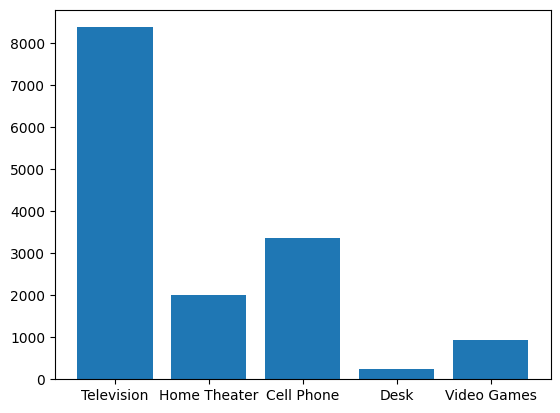

In [13]:
plt.bar(min_sales.keys(),min_sales.values())
plt.show()

2. Compute the total sales for each year and region across all items 

In [14]:
df.groupby(df.index.year)['Sale_amt'].sum()

OrderDate
2018    879029.0
2019    426646.5
Name: Sale_amt, dtype: float64

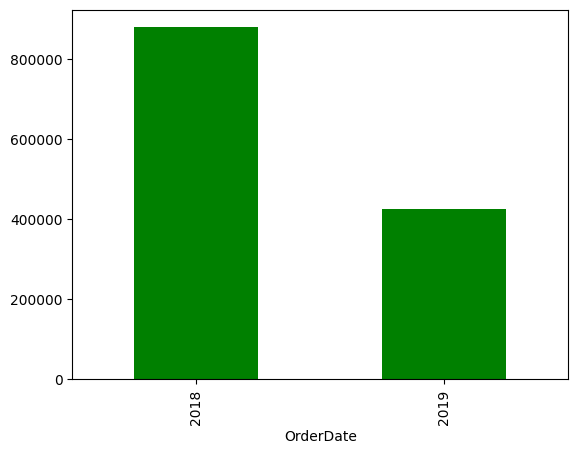

In [15]:
df.groupby(df.index.year)['Sale_amt'].sum().plot.bar(color = "green")
plt.show()

In [16]:
df.groupby(df.Region)['Sale_amt'].sum()

Region
Central    829769.5
East       321007.0
West       154899.0
Name: Sale_amt, dtype: float64

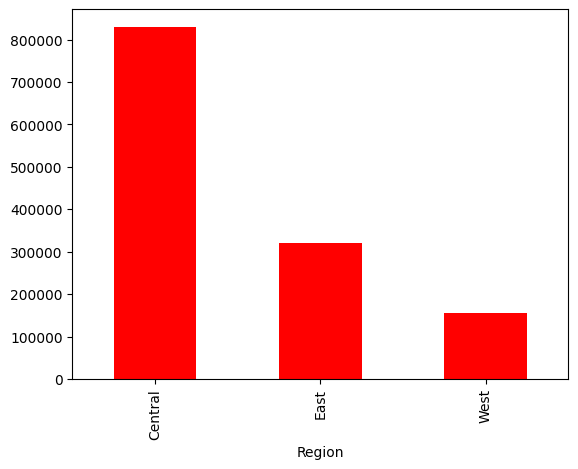

In [17]:
df.groupby(df.Region)['Sale_amt'].sum().plot.bar(color = "red")
plt.show()

In [18]:
df.groupby([df.index.year,'Region'])['Sale_amt'].sum()

OrderDate  Region 
2018       Central    479825.0
           East       293780.0
           West       105424.0
2019       Central    349944.5
           East        27227.0
           West        49475.0
Name: Sale_amt, dtype: float64

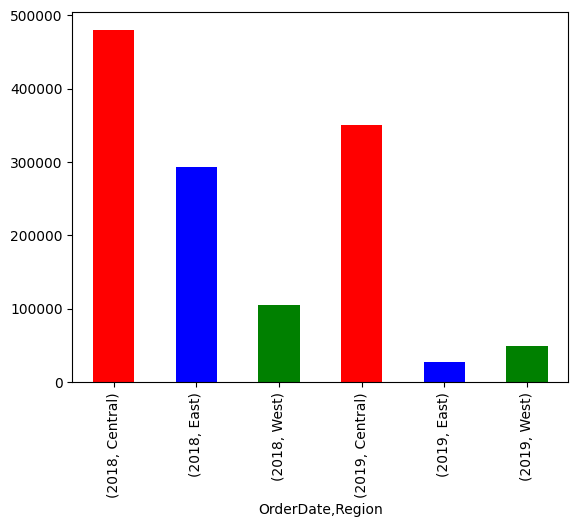

In [19]:
df.groupby([df.index.year,'Region'])['Sale_amt'].sum().plot.bar(color = ["red","blue","green"])
plt.show()

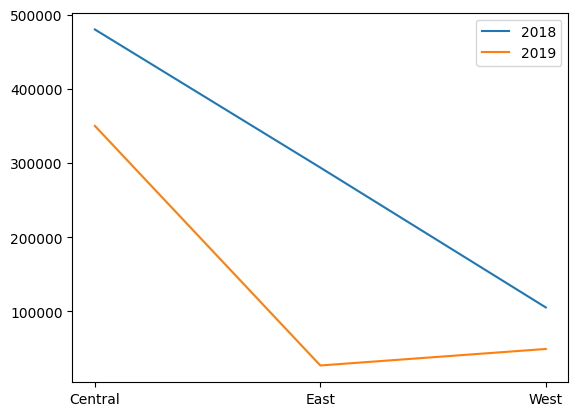

In [20]:
yearwiseregion =  df.groupby([df.index.year,'Region'])['Sale_amt'].sum()
plt.plot(yearwiseregion[2018],label='2018')
plt.plot(yearwiseregion[2019],label='2019')
plt.legend()
plt.show()

3. Create new column 'days_diff' with number of days difference between reference date passed and each order date

In [21]:
df

,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt
OrderDate,,,,,,,
2018-01-06,East,Martha,Alexander,Television,95,1198.0,113810.0
2018-01-23,Central,Hermann,Shelli,Home Theater,50,500.0,25000.0
2018-02-09,Central,Hermann,Luis,Television,36,1198.0,43128.0
2018-02-26,Central,Timothy,David,Cell Phone,27,225.0,6075.0
2018-03-15,West,Timothy,Stephen,Television,56,1198.0,67088.0
2018-04-01,East,Martha,Alexander,Home Theater,60,500.0,30000.0
2018-04-18,Central,Martha,Steven,Television,75,1198.0,89850.0
2018-05-05,Central,Hermann,Luis,Television,90,1198.0,107820.0
2018-05-22,West,Douglas,Michael,Television,32,1198.0,38336.0


In [22]:
import datetime
date_format = "%Y-%m-%d"

ref_date = input("Enter the reference date (YYYY-MM-DD) : ")
ref_date = datetime.datetime.strptime(ref_date, date_format)
print(ref_date)

Enter the reference date (YYYY-MM-DD) : 2021-06-22
2021-06-22 00:00:00


In [23]:
df['diff_days'] = df.index - ref_date
df

,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt,diff_days
OrderDate,,,,,,,,
2018-01-06,East,Martha,Alexander,Television,95,1198.0,113810.0,-1263 days
2018-01-23,Central,Hermann,Shelli,Home Theater,50,500.0,25000.0,-1246 days
2018-02-09,Central,Hermann,Luis,Television,36,1198.0,43128.0,-1229 days
2018-02-26,Central,Timothy,David,Cell Phone,27,225.0,6075.0,-1212 days
2018-03-15,West,Timothy,Stephen,Television,56,1198.0,67088.0,-1195 days
2018-04-01,East,Martha,Alexander,Home Theater,60,500.0,30000.0,-1178 days
2018-04-18,Central,Martha,Steven,Television,75,1198.0,89850.0,-1161 days
2018-05-05,Central,Hermann,Luis,Television,90,1198.0,107820.0,-1144 days
2018-05-22,West,Douglas,Michael,Television,32,1198.0,38336.0,-1127 days


4. Create a dataframe with two columns: 'manager', 'list_of_salesmen'. Column 'manager' will contain the unique managers present and column 'list_of_salesmen' will contain an array of all salesmen under each manager.

In [25]:
df['Manager'].unique()

array(['Martha', 'Hermann', 'Timothy', 'Douglas'], dtype=object)

In [27]:
df['SalesMan'].unique()

array(['Alexander', 'Shelli', 'Luis', 'David', 'Stephen', 'Steven',
       'Michael', 'Sigal', 'Diana', 'Karen', 'John'], dtype=object)

In [74]:
df1 = df["Manager"]
df1 = pd.concat([df1,df["SalesMan"]],axis = 1)
df1 = df1.reset_index()
df1 = df1.drop(["OrderDate"],axis = 1)
df1

,Manager,SalesMan
0,Martha,Alexander
1,Hermann,Shelli
2,Hermann,Luis
3,Timothy,David
4,Timothy,Stephen
5,Martha,Alexander
6,Martha,Steven
7,Hermann,Luis
8,Douglas,Michael
9,Martha,Alexander


In [130]:
df2 = {}
for manager in df['Manager'].unique():
    df2[manager] = [[]]
df2

{'Martha': [[]], 'Hermann': [[]], 'Timothy': [[]], 'Douglas': [[]]}

In [131]:
for index, row in df1.iterrows():
    if row["SalesMan"] not in df2[row["Manager"]][0]:
        df2[row["Manager"]][0] = df2[row["Manager"]][0] + [(row["SalesMan"])]

In [132]:
df2

{'Martha': [['Alexander', 'Steven', 'Diana']],
 'Hermann': [['Shelli', 'Luis', 'Sigal']],
 'Timothy': [['David', 'Stephen']],
 'Douglas': [['Michael', 'Karen', 'John']]}

In [133]:
df2 = pd.DataFrame(df2)
df2 = df2.T
df2 = df2.reset_index()
df2.columns  = ["Manager","list_of_salesmen"]
df2

,Manager,list_of_salesmen
0,Martha,"[Alexander, Steven, Diana]"
1,Hermann,"[Shelli, Luis, Sigal]"
2,Timothy,"[David, Stephen]"
3,Douglas,"[Michael, Karen, John]"


5. For all regions find number of salesman and total sales. Return as a dataframe with three columns - Region, salesmen_count and total_sales

In [152]:
df1 = df.groupby(['Region',"SalesMan"])['Sale_amt'].sum()

In [153]:
df1 = pd.DataFrame(df1)

In [156]:
df1

Sale_amt
Region  SalesMan           
Central David      140955.0
        John       124016.0
        Luis       206373.0
        Shelli      33698.0
        Sigal      125037.5
        Steven     199690.0
East    Alexander  236703.0
        Diana       36100.0
        Karen       48204.0
West    Michael     66836.0
        Stephen     88063.0

In [163]:
df.groupby("Region").agg(salesmen_count=("SalesMan", "nunique"), total_sales=("Sale_amt", "sum")).reset_index()

,Region,salesmen_count,total_sales
0,Central,6,829769.5
1,East,3,321007.0
2,West,2,154899.0


Text(0.5, 1.0, 'Total Sales')

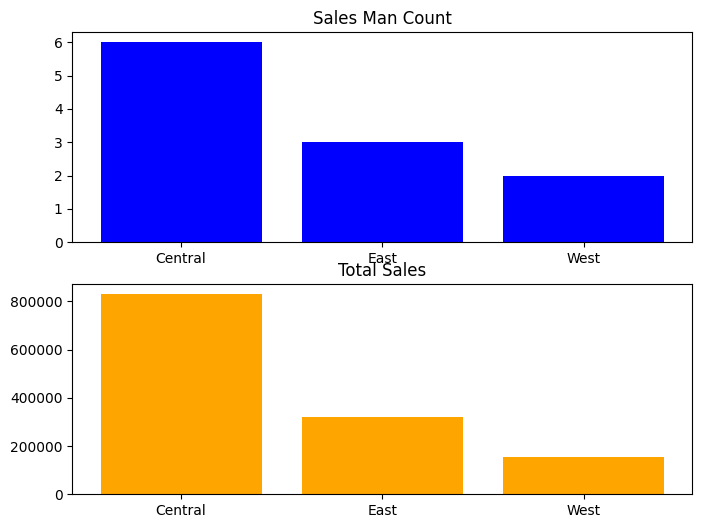

In [171]:
df1 = df.groupby("Region").agg(salesmen_count=("SalesMan", "nunique"), total_sales=("Sale_amt", "sum")).reset_index()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
ax1.bar(df1.Region,df1.salesmen_count, color='blue')
ax1.set_title('Sales Man Count')


ax2.bar(df1.Region,df1.total_sales,color = "orange")
ax2.set_title('Total Sales')

6. Create a dataframe with total sales as percentage for each manager. Dataframe to contain manager and percent_sales

In [174]:
df1 = df.groupby("Manager").agg(total_sales=("Sale_amt", "sum")).reset_index()
df1

,Manager,total_sales
0,Douglas,239056.0
1,Hermann,365108.5
2,Martha,472493.0
3,Timothy,229018.0


In [175]:
total_sales_sum = df1['total_sales'].sum()
df1['sales_percentage'] = (df1['total_sales'] / total_sales_sum) * 100
df1

,Manager,total_sales,sales_percentage
0,Douglas,239056.0,18.308990
1,Hermann,365108.5,27.963188
2,Martha,472493.0,36.187629
3,Timothy,229018.0,17.540193


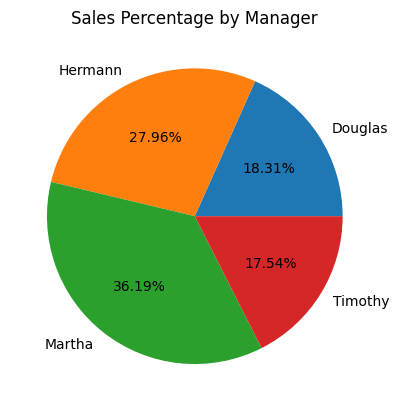

In [178]:
plt.pie(df1['sales_percentage'], labels=df1["Manager"], autopct='%1.2f%%')

plt.title('Sales Percentage by Manager')
plt.show()

## IMDB.csv
Utilize the imdb data set (duration is in seconds) The imdb data contains the rating and other information related to movies and episodes across a lot of genres and years.

7. Get the imdb rating for fifth movie of dataframe 
8. Return titles of movies with shortest and longest run time 
9. Sort the data frame by in the order of when they were released and have higher ratings, Hint : release_date (earliest) and Imdb rating(highest to lowest) 
10. Subset the dataframe with movies having the following parameters. duration between 30 minutes to 180 minutes.


##### Reading the data:


In [14]:
df = pd.read_csv("imdb.csv", escapechar='\\')
df

,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
0,titles01/tt0012349,tt0012349,Der Vagabund und das Kind (1921),der vagabund und das kind,http://www.imdb.com/title/tt0012349/,8.4,40550.0,3240.0,1921.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
1,titles01/tt0015864,tt0015864,Goldrausch (1925),goldrausch,http://www.imdb.com/title/tt0015864/,8.3,45319.0,5700.0,1925.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
2,titles01/tt0017136,tt0017136,Metropolis (1927),metropolis,http://www.imdb.com/title/tt0017136/,8.4,81007.0,9180.0,1927.0,video.movie,...,0,0,0,1,0,0,0,0,0,0
3,titles01/tt0017925,tt0017925,Der General (1926),der general,http://www.imdb.com/title/tt0017925/,8.3,37521.0,6420.0,1926.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
4,titles01/tt0021749,tt0021749,Lichter der Großstadt (1931),lichter der gro stadt,http://www.imdb.com/title/tt0021749/,8.7,70057.0,5220.0,1931.0,video.movie,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14755,titles04/index.html.9989,tt0672488,Peep Show Sectioning (TV Episode 2005),peep show sectioning tv episode,http://www.imdb.com/title/tt0672488/,7.7,135.0,1440.0,2005.0,video.episode,...,0,0,0,0,0,0,0,0,0,0
14756,titles04/index.html.9992,tt0675644,Playhouse 90 The Miracle Worker (TV Episode 1957),playhouse the miracle worker tv episode,http://www.imdb.com/title/tt0675644/,7.3,8.0,5400.0,1957.0,video.episode,...,0,0,0,0,0,0,0,0,0,0
14757,titles04/index.html.9994,tt0679222,Private Screenings Robert Mitchum and Jane Rus...,private screenings robert mitchum and jane rus...,http://www.imdb.com/title/tt0679222/,7.0,20.0,3600.0,1996.0,video.episode,...,0,0,0,0,0,0,1,0,0,0
14758,titles04/index.html.9995,tt0680064,Providence All the King's Men (TV Episode 2002),providence all the king s men tv episode,http://www.imdb.com/title/tt0680064/,NaN,NaN,3600.0,2002.0,video.episode,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df.isnull().sum()

fn                     0
tid                    0
title                  0
wordsInTitle          13
url                    0
imdbRating          1210
ratingCount         1210
duration            1016
year                  30
type                   0
nrOfWins               0
nrOfNominations        0
nrOfPhotos             0
nrOfNewsArticles       0
nrOfUserReviews        0
nrOfGenre              0
Action                 0
Adult                  0
Adventure              0
Animation              0
Biography              0
Comedy                 0
Crime                  0
Documentary            0
Drama                  0
Family                 0
Fantasy                0
FilmNoir               0
GameShow               0
History                0
Horror                 0
Music                  0
Musical                0
Mystery                0
News                   0
RealityTV              0
Romance                0
SciFi                  0
Short                  0
Sport                  0


In [37]:
df = df.dropna()
df

,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
0,titles01/tt0012349,tt0012349,Der Vagabund und das Kind (1921),der vagabund und das kind,http://www.imdb.com/title/tt0012349/,8.4,40550.0,3240.0,1921.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
1,titles01/tt0015864,tt0015864,Goldrausch (1925),goldrausch,http://www.imdb.com/title/tt0015864/,8.3,45319.0,5700.0,1925.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
2,titles01/tt0017136,tt0017136,Metropolis (1927),metropolis,http://www.imdb.com/title/tt0017136/,8.4,81007.0,9180.0,1927.0,video.movie,...,0,0,0,1,0,0,0,0,0,0
3,titles01/tt0017925,tt0017925,Der General (1926),der general,http://www.imdb.com/title/tt0017925/,8.3,37521.0,6420.0,1926.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
4,titles01/tt0021749,tt0021749,Lichter der Großstadt (1931),lichter der gro stadt,http://www.imdb.com/title/tt0021749/,8.7,70057.0,5220.0,1931.0,video.movie,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14754,titles04/index.html.9987,tt0669703,Parker Lewis - Der Coole von der Schule Parker...,parker lewis der coole von der schule parker l...,http://www.imdb.com/title/tt0669703/,7.6,16.0,1800.0,1991.0,video.episode,...,0,0,0,0,0,0,0,0,0,0
14755,titles04/index.html.9989,tt0672488,Peep Show Sectioning (TV Episode 2005),peep show sectioning tv episode,http://www.imdb.com/title/tt0672488/,7.7,135.0,1440.0,2005.0,video.episode,...,0,0,0,0,0,0,0,0,0,0
14756,titles04/index.html.9992,tt0675644,Playhouse 90 The Miracle Worker (TV Episode 1957),playhouse the miracle worker tv episode,http://www.imdb.com/title/tt0675644/,7.3,8.0,5400.0,1957.0,video.episode,...,0,0,0,0,0,0,0,0,0,0
14757,titles04/index.html.9994,tt0679222,Private Screenings Robert Mitchum and Jane Rus...,private screenings robert mitchum and jane rus...,http://www.imdb.com/title/tt0679222/,7.0,20.0,3600.0,1996.0,video.episode,...,0,0,0,0,0,0,1,0,0,0


In [38]:
df.columns

Index(['fn', 'tid', 'title', 'wordsInTitle', 'url', 'imdbRating',
       'ratingCount', 'duration', 'year', 'type', 'nrOfWins',
       'nrOfNominations', 'nrOfPhotos', 'nrOfNewsArticles', 'nrOfUserReviews',
       'nrOfGenre', 'Action', 'Adult', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'FilmNoir', 'GameShow', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'News', 'RealityTV', 'Romance', 'SciFi', 'Short', 'Sport',
       'TalkShow', 'Thriller', 'War', 'Western'],
      dtype='object')

7. Get the imdb rating for fifth movie of dataframe 

In [39]:
df.loc[5,"imdbRating"]

8.5

8. Return titles of movies with shortest and longest run time

In [40]:
df["duration"].max()

68400.0

In [41]:
df["duration"].min()

2.0

In [42]:
print("Longest Run Time: " , df[df["duration"] == df["duration"].max()]["title"].values[0])
print("Shortest Run Time: " , df[df["duration"] == df["duration"].min()]["title"].values[0])

Longest Run Time:  Baseball The National Pastime (TV Episode 1994)
Shortest Run Time:  Traffic Crossing Leeds Bridge (1888)


9. Sort the data frame by in the order of when they were released and have higher ratings, Hint : release_date (earliest) and Imdb rating(highest to lowest)

In [43]:
sorted_df = df.sort_values(by=["year", "imdbRating"], ascending=[True, False])
sorted_df

,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
13681,titles04/index.html.8070,tt0343112,Traffic Crossing Leeds Bridge (1888),traffic crossing leeds bridge,http://www.imdb.com/title/tt0343112/,7.2,1442.0,2.0,1888.0,video.movie,...,0,0,0,0,1,0,0,0,0,0
6908,titles04/index.html,tt0000005,Blacksmith Scene (1893),blacksmith scene,http://www.imdb.com/title/tt0000005/,6.3,1039.0,60.0,1893.0,video.movie,...,0,0,0,0,1,0,0,0,0,0
12690,titles04/index.html.6501,tt0177707,Dickson Experimental Sound Film (1894),dickson experimental sound film,http://www.imdb.com/title/tt0177707/,6.8,965.0,22.0,1894.0,video.movie,...,0,0,0,0,1,0,0,0,0,0
6909,titles04/index.html.1,tt0000248,The Kiss in the Tunnel (1899),the kiss in the tunnel,http://www.imdb.com/title/tt0000248/,5.9,530.0,60.0,1899.0,video.movie,...,0,0,1,0,1,0,0,0,0,0
9880,titles04/index.html.2,tt0000306,Le duel d'Hamlet (1900),le duel d hamlet,http://www.imdb.com/title/tt0000306/,5.8,83.0,120.0,1900.0,video.movie,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9447,titles04/index.html.14312,tt3027506,Taxi Brooklyn (TV Series 2014– ),taxi brooklyn tv series,http://www.imdb.com/title/tt3027506/,5.3,484.0,2580.0,2014.0,video.tv,...,0,0,0,0,0,0,0,0,0,0
9324,titles04/index.html.14114,tt2528814,God's Not Dead (2014),god s not dead,http://www.imdb.com/title/tt2528814/,4.9,12332.0,6780.0,2014.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
9474,titles04/index.html.14355,tt3138104,The Hungover Games (2014),the hungover games,http://www.imdb.com/title/tt3138104/,3.9,3827.0,5100.0,2014.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
9532,titles04/index.html.14492,tt3465488,Karle Pyaar Karle (2014),karle pyaar karle,http://www.imdb.com/title/tt3465488/,3.5,53.0,6600.0,2014.0,video.movie,...,0,0,1,0,0,0,0,0,0,0


10. Subset the dataframe with movies having the following parameters. duration between 30 minutes to 180 minutes.

In [45]:
sorted_df[(30.0<=sorted_df['duration']) & (sorted_df['duration']<=180.0)]

,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
6908,titles04/index.html,tt0000005,Blacksmith Scene (1893),blacksmith scene,http://www.imdb.com/title/tt0000005/,6.3,1039.0,60.0,1893.0,video.movie,...,0,0,0,0,1,0,0,0,0,0
6909,titles04/index.html.1,tt0000248,The Kiss in the Tunnel (1899),the kiss in the tunnel,http://www.imdb.com/title/tt0000248/,5.9,530.0,60.0,1899.0,video.movie,...,0,0,1,0,1,0,0,0,0,0
9880,titles04/index.html.2,tt0000306,Le duel d'Hamlet (1900),le duel d hamlet,http://www.imdb.com/title/tt0000306/,5.8,83.0,120.0,1900.0,video.movie,...,0,0,0,0,1,0,0,0,0,0
12477,titles04/index.html.6188,tt0140812,Any Bonds Today? (1942),any bonds today,http://www.imdb.com/title/tt0140812/,5.9,202.0,180.0,1942.0,video.movie,...,0,0,0,0,1,0,0,0,0,0
13227,titles04/index.html.7330,tt0272170,Let's All Go to the Lobby (1957),let s all go to the lobby,http://www.imdb.com/title/tt0272170/,6.5,348.0,60.0,1957.0,video.movie,...,0,0,0,0,1,0,0,0,0,0
3376,titles03/index.html.3047,tt0191831,Bigfoot (1967),bigfoot,http://www.imdb.com/title/tt0191831/,7.3,198.0,60.0,1967.0,video.movie,...,0,0,0,0,1,0,0,0,0,0
7485,titles04/index.html.11013,tt1024675,The Wayne Train (TV Movie 1973),the wayne train tv movie,http://www.imdb.com/title/tt1024675/,5.8,10.0,180.0,1973.0,video.movie,...,0,0,0,0,1,0,0,0,0,0
10970,titles04/index.html.3732,tt0086855,The Adventures of André and Wally B. (1984),the adventures of andr and wally b,http://www.imdb.com/title/tt0086855/,5.4,2777.0,120.0,1984.0,video.movie,...,0,0,0,0,1,0,0,0,0,0
2518,titles03/index.html.1911,tt0091455,Die kleine Lampe (1986),die kleine lampe,http://www.imdb.com/title/tt0091455/,7.5,5793.0,120.0,1986.0,video.movie,...,0,0,0,0,1,0,0,0,0,0
11561,titles04/index.html.4697,tt0102359,Luxo Jr. in 'Surprise' and 'Light & Heavy' (1991),luxo jr in surprise and light heavy,http://www.imdb.com/title/tt0102359/,6.7,367.0,60.0,1991.0,video.movie,...,0,0,0,0,1,0,0,0,0,0


### diamonds.csv

 Utilize the diamonds data set. The diamonds data set contains the various dimensions and information for each diamond. 

11. Count the duplicate rows of diamonds DataFrame. 
12. Drop rows in case of missing values in carat and cut columns.
 13. Subset the dataframe with only numeric columns. 
14. Compute volume as (xyz) when depth is greater than 60. In case of depth less than 60 default volume to 8. 
15. Impute missing price values with mean.


In [46]:
df = pd.read_csv("diamonds.csv")

In [47]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53939,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53940,0.7,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53941,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74


11. Drop rows in case of missing values in carat and cut columns.

In [49]:
df.isnull().sum()

carat      1
cut        1
color      0
clarity    0
depth      0
table      0
price      4
x          0
y          0
z          5
dtype: int64

In [51]:
df = df.dropna(subset=['carat','cut'])
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53939,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53940,0.7,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53941,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74


12. Count the duplicate rows of diamonds DataFrame.

In [52]:
duplicates_count = df.duplicated().sum()
duplicates_count

149

13. Subset the dataframe with only numeric columns.

In [56]:
df.dtypes

carat       object
cut         object
color       object
clarity     object
depth      float64
table      float64
price      float64
x          float64
y          float64
z          float64
dtype: object

In [61]:
numeric_df = df.select_dtypes(include=['int', 'float'])
numeric_df

,depth,table,price,x,y,z
0,61.5,55.0,326.0,3.95,3.98,2.43
1,59.8,61.0,326.0,3.89,3.84,2.31
2,56.9,65.0,327.0,4.05,4.07,2.31
3,62.4,58.0,334.0,4.20,4.23,2.63
4,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...
53938,60.8,57.0,2757.0,5.75,5.76,3.50
53939,63.1,55.0,2757.0,5.69,5.75,3.61
53940,62.8,60.0,2757.0,5.66,5.68,3.56
53941,61.0,58.0,2757.0,6.15,6.12,3.74


14. Compute volume as (xyz) when depth is greater than 60. In case of depth less than 60 default volume to 8.

In [74]:
numeric_df['volume'] = numeric_df.x * numeric_df.y * numeric_df.z

In [75]:
numeric_df

,depth,table,price,x,y,z,volume
0,61.5,55.0,326.0,3.95,3.98,2.43,38.202030
1,59.8,61.0,326.0,3.89,3.84,2.31,34.505856
2,56.9,65.0,327.0,4.05,4.07,2.31,38.076885
3,62.4,58.0,334.0,4.20,4.23,2.63,46.724580
4,63.3,58.0,335.0,4.34,4.35,2.75,51.917250
...,...,...,...,...,...,...,...
53938,60.8,57.0,2757.0,5.75,5.76,3.50,115.920000
53939,63.1,55.0,2757.0,5.69,5.75,3.61,118.110175
53940,62.8,60.0,2757.0,5.66,5.68,3.56,114.449728
53941,61.0,58.0,2757.0,6.15,6.12,3.74,140.766120


In [76]:
for index,rows in numeric_df.iterrows():
    if numeric_df["depth"][index] <= 60:
        numeric_df["volume"][index] = 8

In [77]:
numeric_df

,depth,table,price,x,y,z,volume
0,61.5,55.0,326.0,3.95,3.98,2.43,38.202030
1,59.8,61.0,326.0,3.89,3.84,2.31,8.000000
2,56.9,65.0,327.0,4.05,4.07,2.31,8.000000
3,62.4,58.0,334.0,4.20,4.23,2.63,46.724580
4,63.3,58.0,335.0,4.34,4.35,2.75,51.917250
...,...,...,...,...,...,...,...
53938,60.8,57.0,2757.0,5.75,5.76,3.50,115.920000
53939,63.1,55.0,2757.0,5.69,5.75,3.61,118.110175
53940,62.8,60.0,2757.0,5.66,5.68,3.56,114.449728
53941,61.0,58.0,2757.0,6.15,6.12,3.74,140.766120


15. Impute missing price values with mean

In [78]:
numeric_df.isnull().sum()

depth     0
table     0
price     4
x         0
y         0
z         5
volume    5
dtype: int64

In [79]:
numeric_df['price'] = numeric_df['price'].fillna(df['price'].mean())
numeric_df

,depth,table,price,x,y,z,volume
0,61.5,55.0,326.0,3.95,3.98,2.43,38.202030
1,59.8,61.0,326.0,3.89,3.84,2.31,8.000000
2,56.9,65.0,327.0,4.05,4.07,2.31,8.000000
3,62.4,58.0,334.0,4.20,4.23,2.63,46.724580
4,63.3,58.0,335.0,4.34,4.35,2.75,51.917250
...,...,...,...,...,...,...,...
53938,60.8,57.0,2757.0,5.75,5.76,3.50,115.920000
53939,63.1,55.0,2757.0,5.69,5.75,3.61,118.110175
53940,62.8,60.0,2757.0,5.66,5.68,3.56,114.449728
53941,61.0,58.0,2757.0,6.15,6.12,3.74,140.766120


In [80]:
numeric_df.isnull().sum()

depth     0
table     0
price     0
x         0
y         0
z         5
volume    5
dtype: int64